In [35]:
# importing the required libraries 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file
import matplotlib.pyplot as plt # data visualization 
import seaborn as sns  # python library for vidualization
import matplotlib.colors as clrs # set up the color
import matplotlib.cm as cm # set up the color

import warnings
import os

from pandas import plotting
from pandas import plotting
from sklearn.cluster import KMeans # Kmeans algorithm from scikit-learn
from sklearn.cluster import DBSCAN
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline


In [36]:
# import the dataset
df = pd.read_csv("https://raw.githubusercontent.com/UMBC-Data-Science/DATA602Datasets/main/Mall_Customers.csv")
df.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


In [46]:
# extracting values from two
# columns for clustering
df_new = df[['Age',
             'Annual Income (k$)',
             'Spending Score (1-100)']].values


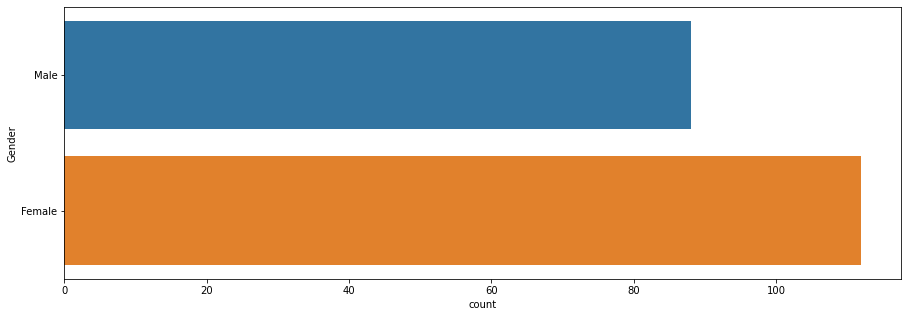

In [47]:
plt.figure(1 , figsize = (15 , 5))
sns.countplot(y = 'Gender' , data = df)
plt.show()

In [48]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [49]:
# extracting values from two
# columns for clustering
df_new = df[['Age','Annual Income (k$)','Spending Score (1-100)']]

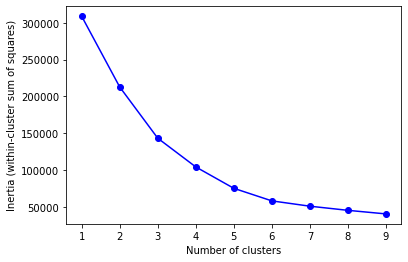

In [50]:
Ks = range(1, 10)
inertia = [KMeans(i).fit(df_new).inertia_ for i in Ks]

fig = plt.figure()
plt.plot(Ks, inertia, '-bo')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia (within-cluster sum of squares)')
plt.show()

In [51]:
#implement k means with optimal number of k
k = 3
kmeans = KMeans(n_clusters=k, random_state=1)
kmeans.fit(df_new)

# print inertia & cluster center
print("inertia for k=3 is", kmeans.inertia_)
print("cluster centers: ", kmeans.cluster_centers_)

# take a quick look at the result
y = kmeans.labels_
print("cluster labels: ", y)

inertia for k=3 is 143342.751571706
cluster centers:  [[40.39473684 87.         18.63157895]
 [40.32520325 44.15447154 49.82926829]
 [32.69230769 86.53846154 82.12820513]]
cluster labels:  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


In [52]:
# printing the shape of dataset
print(df.shape)

# null values present
print(df.isnull().sum())


(200, 5)
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [53]:
norm = clrs.Normalize(vmin=0.,vmax=y.max() + 0.8)
cmap = cm.viridis

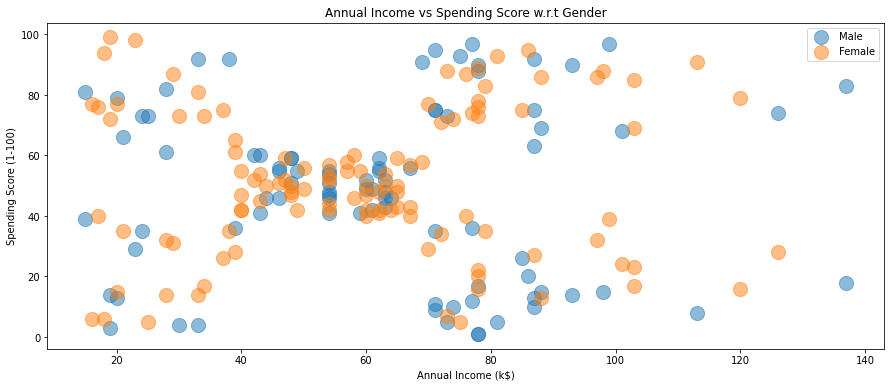

In [54]:
plt.figure(1 , figsize = (15 , 6))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Annual Income (k$)',y = 'Spending Score (1-100)' ,
                data = df[df['Gender'] == gender] ,s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Annual Income (k$)'), 
plt.ylabel('Spending Score (1-100)') 
plt.title('Annual Income vs Spending Score w.r.t Gender')
plt.legend()
plt.show()

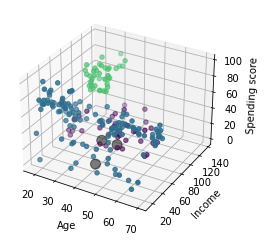

In [55]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_new.iloc[:,0], df_new.iloc[:,1], df_new.iloc[:,2], c=cmap(norm(y)), marker='o')
centers = kmeans.cluster_centers_
ax.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.5)
ax.set_xlabel('Age')
ax.set_ylabel('Income')
ax.set_zlabel('Spending score')

plt.show()

In [ ]:
# References
